In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from Score import ScoreClass
from DataFuncs import DataFuncs
from PlotFunctions import PlotFuncs
sns.set(style="darkgrid", rc={'figure.figsize':(30,20)})

import warnings
warnings.filterwarnings("ignore")

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Enable interactive notebook

In [3]:
%matplotlib notebook

# Main


Load Experiment data. 

In [4]:
all_tag_measurements = pd.read_pickle(r'tag_measurements_2020_03_28.pkl')
rolling_by_2 = 1

Load DB data

In [5]:
DB_pickle = r'useful_dbs\BBIL\tag_measurements_BBIL_all.pkl'
all_tag_measurements = pd.read_pickle(DB_pickle)
rolling_by_2 = 0
all_tag_measurements

time  beaconid  edgenodeid  rssi  realx  \
0      2018-09-24 23:22:15.500000+00:00         9           1 -83.0  10.00   
1      2018-09-24 23:22:15.500000+00:00         9           8 -78.0  10.00   
2      2018-09-24 23:22:15.500000+00:00         9          13 -85.0  10.00   
3      2018-09-24 23:22:15.500000+00:00         9           2 -96.0  10.00   
4      2018-09-24 23:22:15.500000+00:00         9          11 -91.0  10.00   
...                                 ...       ...         ...   ...    ...   
443813        2019-05-23 04:34:24+00:00         9          53 -80.0   1.14   
443814        2019-05-23 04:34:24+00:00         9          56 -69.0   1.14   
443815        2019-05-23 04:34:24+00:00         9          50 -83.0   1.14   
443816        2019-05-23 04:34:24+00:00         9          51 -76.0   1.14   
443817        2019-05-23 04:34:24+00:00         9          58 -68.0   1.14   

        realy   distance  isSameRoom    DisplayName          setup  \
0       8.337   9.981271           0   1_phone_BBIL  Phone in hand   
1       8.337  10.105009           0   8_phone_BBIL  Phone in hand   
2       8.337   5.754672           0  13_phone_BBIL  Phone in hand   
3       8.337  14.841726           0   2_phone_BBIL  Phone in hand   
4       8.337  12.393324           0  11_phone_BBIL  Phone in hand   
...       ...        ...         ...            ...            ...   
443813  3.824   5.368501           1  53_phone_BBIL  Phone in hand   
443814  3.824   8.007980           1  56_phone_BBIL  Phone in hand   
443815  3.824   4.094613           1  50_phone_BBIL  Phone in hand   
443816  3.824   1.205840           1  51_phone_BBIL  Phone in hand   
443817  3.824   3.832535           1  58_phone_BBIL  Phone in hand   

              obstacle  
0       Obstacle: wall  
1       Obstacle: wall  
2       Obstacle: wall  
3       Obstacle: wall  
4       Obstacle: wall  
...                ...  
443813     No Obstacle  
443814     No Obstacle  
443815     No Obstacle  
443816     No Obstacle  
443817     No Obstacle  

[443818 rows x 11 columns]

# Plot window data

In [6]:
DataFuncsObj = DataFuncs()
all_tag_measurements = all_tag_measurements.dropna(how='any').reset_index(drop=True)
#for not windowing data choose winsize 1 second
win_size_seconds = 60

Choose data to plot

In [ ]:
# choose all data
plot_tag_data = all_tag_measurements

In [ ]:
# exclude specific display names
plot_tag_data = DataFuncsObj.exclude_display_name_from_df(all_tag_measurements,'GalaxyNote4_AZer')

In [7]:
#normalized data 
norm_distance = 1 #m
setup = 'Phone in hand'
plot_tag_data = DataFuncsObj.normalize_by_distance(all_tag_measurements,norm_distance, setup )

10_phone_BBIL:There is no 1m distance, Therefore we use 1.61390156143428m to normalize
11_phone_BBIL:There is no 1m distance, Therefore we use 1.93717345635335m to normalize
12_phone_BBIL:There is no 1m distance, Therefore we use 0.9935446601615541m to normalize
13_phone_BBIL:There is no 1m distance, Therefore we use 0.9981054553502829m to normalize
1_phone_BBIL:There is no 1m distance, Therefore we use 1.0012772505824101m to normalize
2_phone_BBIL:There is no 1m distance, Therefore we use 1.74055875499954m to normalize
3_phone_BBIL:There is no 1m distance, Therefore we use 0.9971827130274008m to normalize
50_phone_BBIL:There is no 1m distance, Therefore we use 1.00263007247051m to normalize
51_phone_BBIL:There is no 1m distance, Therefore we use 1.12927202767978m to normalize
52_phone_BBIL:There is no 1m distance, Therefore we use 1.73983220774623m to normalize
53_phone_BBIL:There is no 1m distance, Therefore we use 1.5429994239215499m to normalize
54_phone_BBIL:There is no 1m distanc

In [8]:
PlotFuncsObj = PlotFuncs(plot_tag_data, win_size_seconds)

Plot move mean

<IPython.core.display.Javascript object>


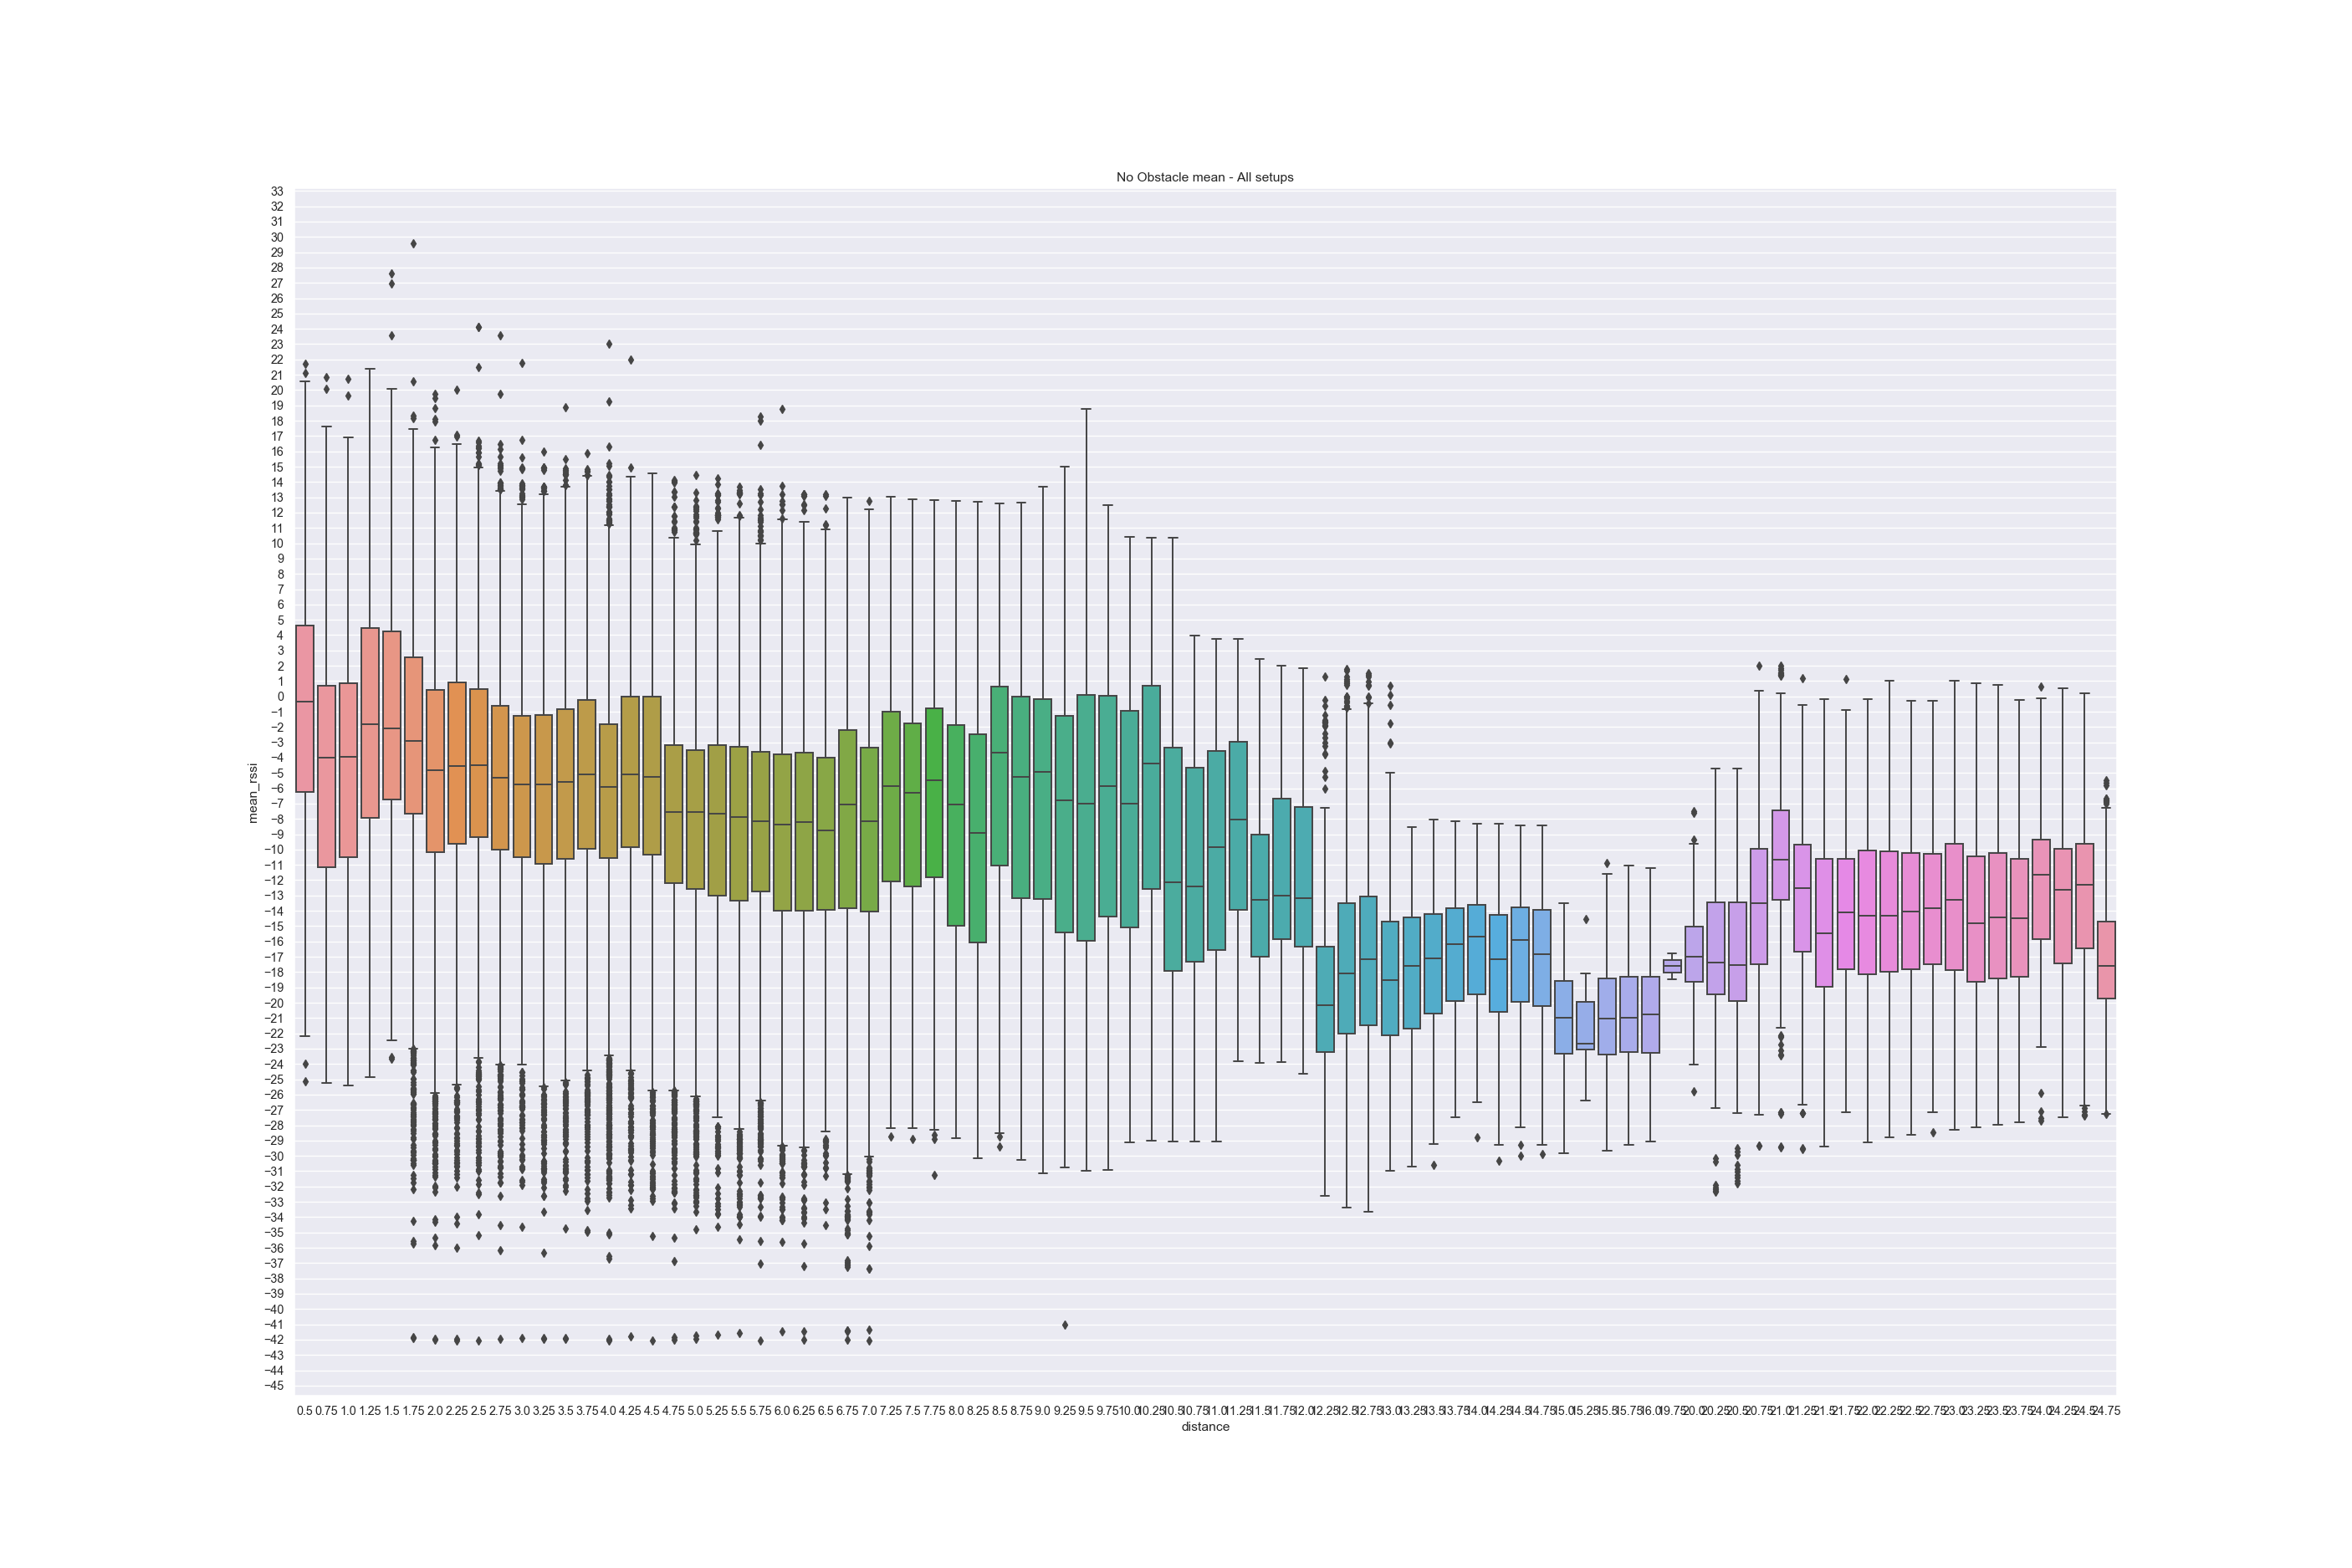

In [9]:
PlotFuncsObj.set_minor_axes_size(1)
PlotFuncsObj.plot_data( 'mean', plot_func='boxplot',obstacle='No Obstacle', plot_hue=0,roll_by_2= rolling_by_2)
fig1 = plt.gcf()
# PlotFuncsObj.set_minor_axes_size(5)
fig1.savefig("mean_rssi.png")

In [ ]:
PlotFuncsObj.plot_data( 'mean', plot_func='violinplot',obstacle='No Obstacle',roll_by_2= rolling_by_2)
fig1 = plt.gcf()
# fig1.savefig("mean_rssi_violinplot.png")

Plot move median

<IPython.core.display.Javascript object>


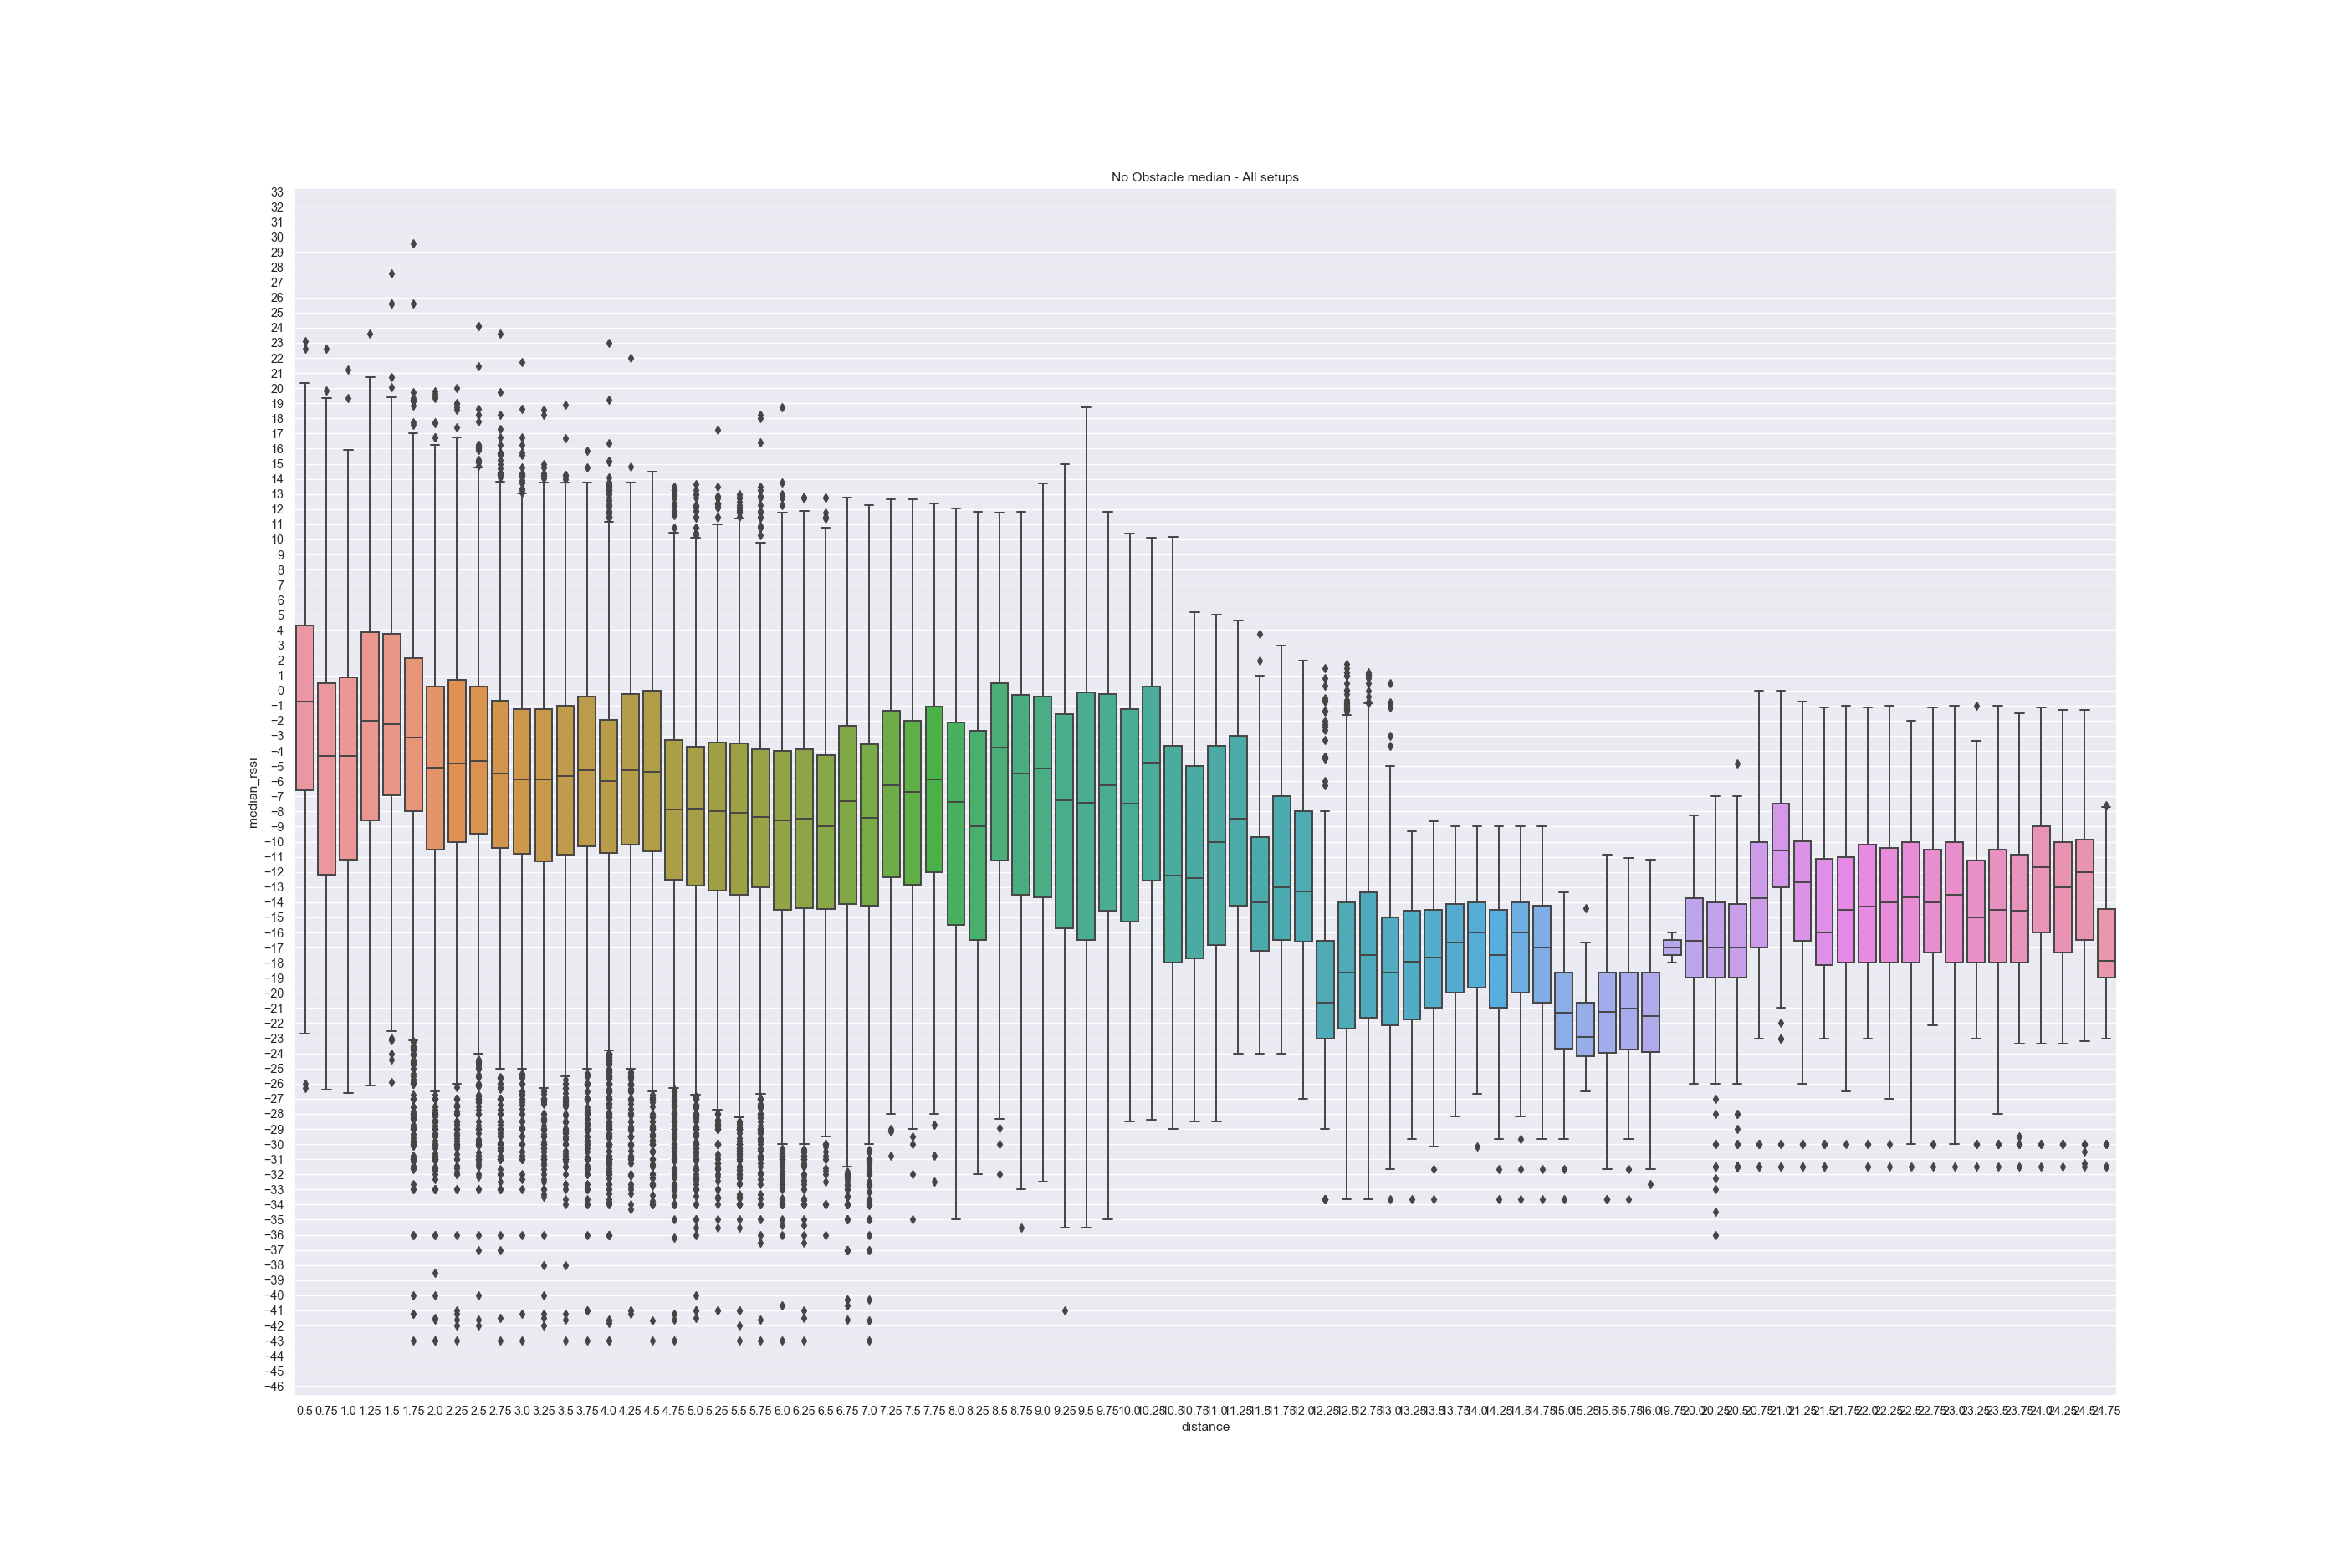

In [10]:
PlotFuncsObj.plot_data( 'median', plot_func='boxplot',obstacle='No Obstacle',roll_by_2= rolling_by_2, plot_hue=0)
fig1 = plt.gcf()
fig1.savefig("median_rssi.png")

In [ ]:
PlotFuncsObj.plot_data( 'median', plot_func='violinplot',obstacle='No Obstacle',roll_by_2= rolling_by_2)
fig1 = plt.gcf()
# fig1.savefig("median_rssi_violinplot.png")

Plot move variance

In [ ]:
PlotFuncsObj.plot_data( 'var', plot_func='boxplot',obstacle='No Obstacle',roll_by_2= rolling_by_2, plot_hue=1)
fig1 = plt.gcf()
# fig1.savefig("var_rssi.png")

Plot counts

<IPython.core.display.Javascript object>


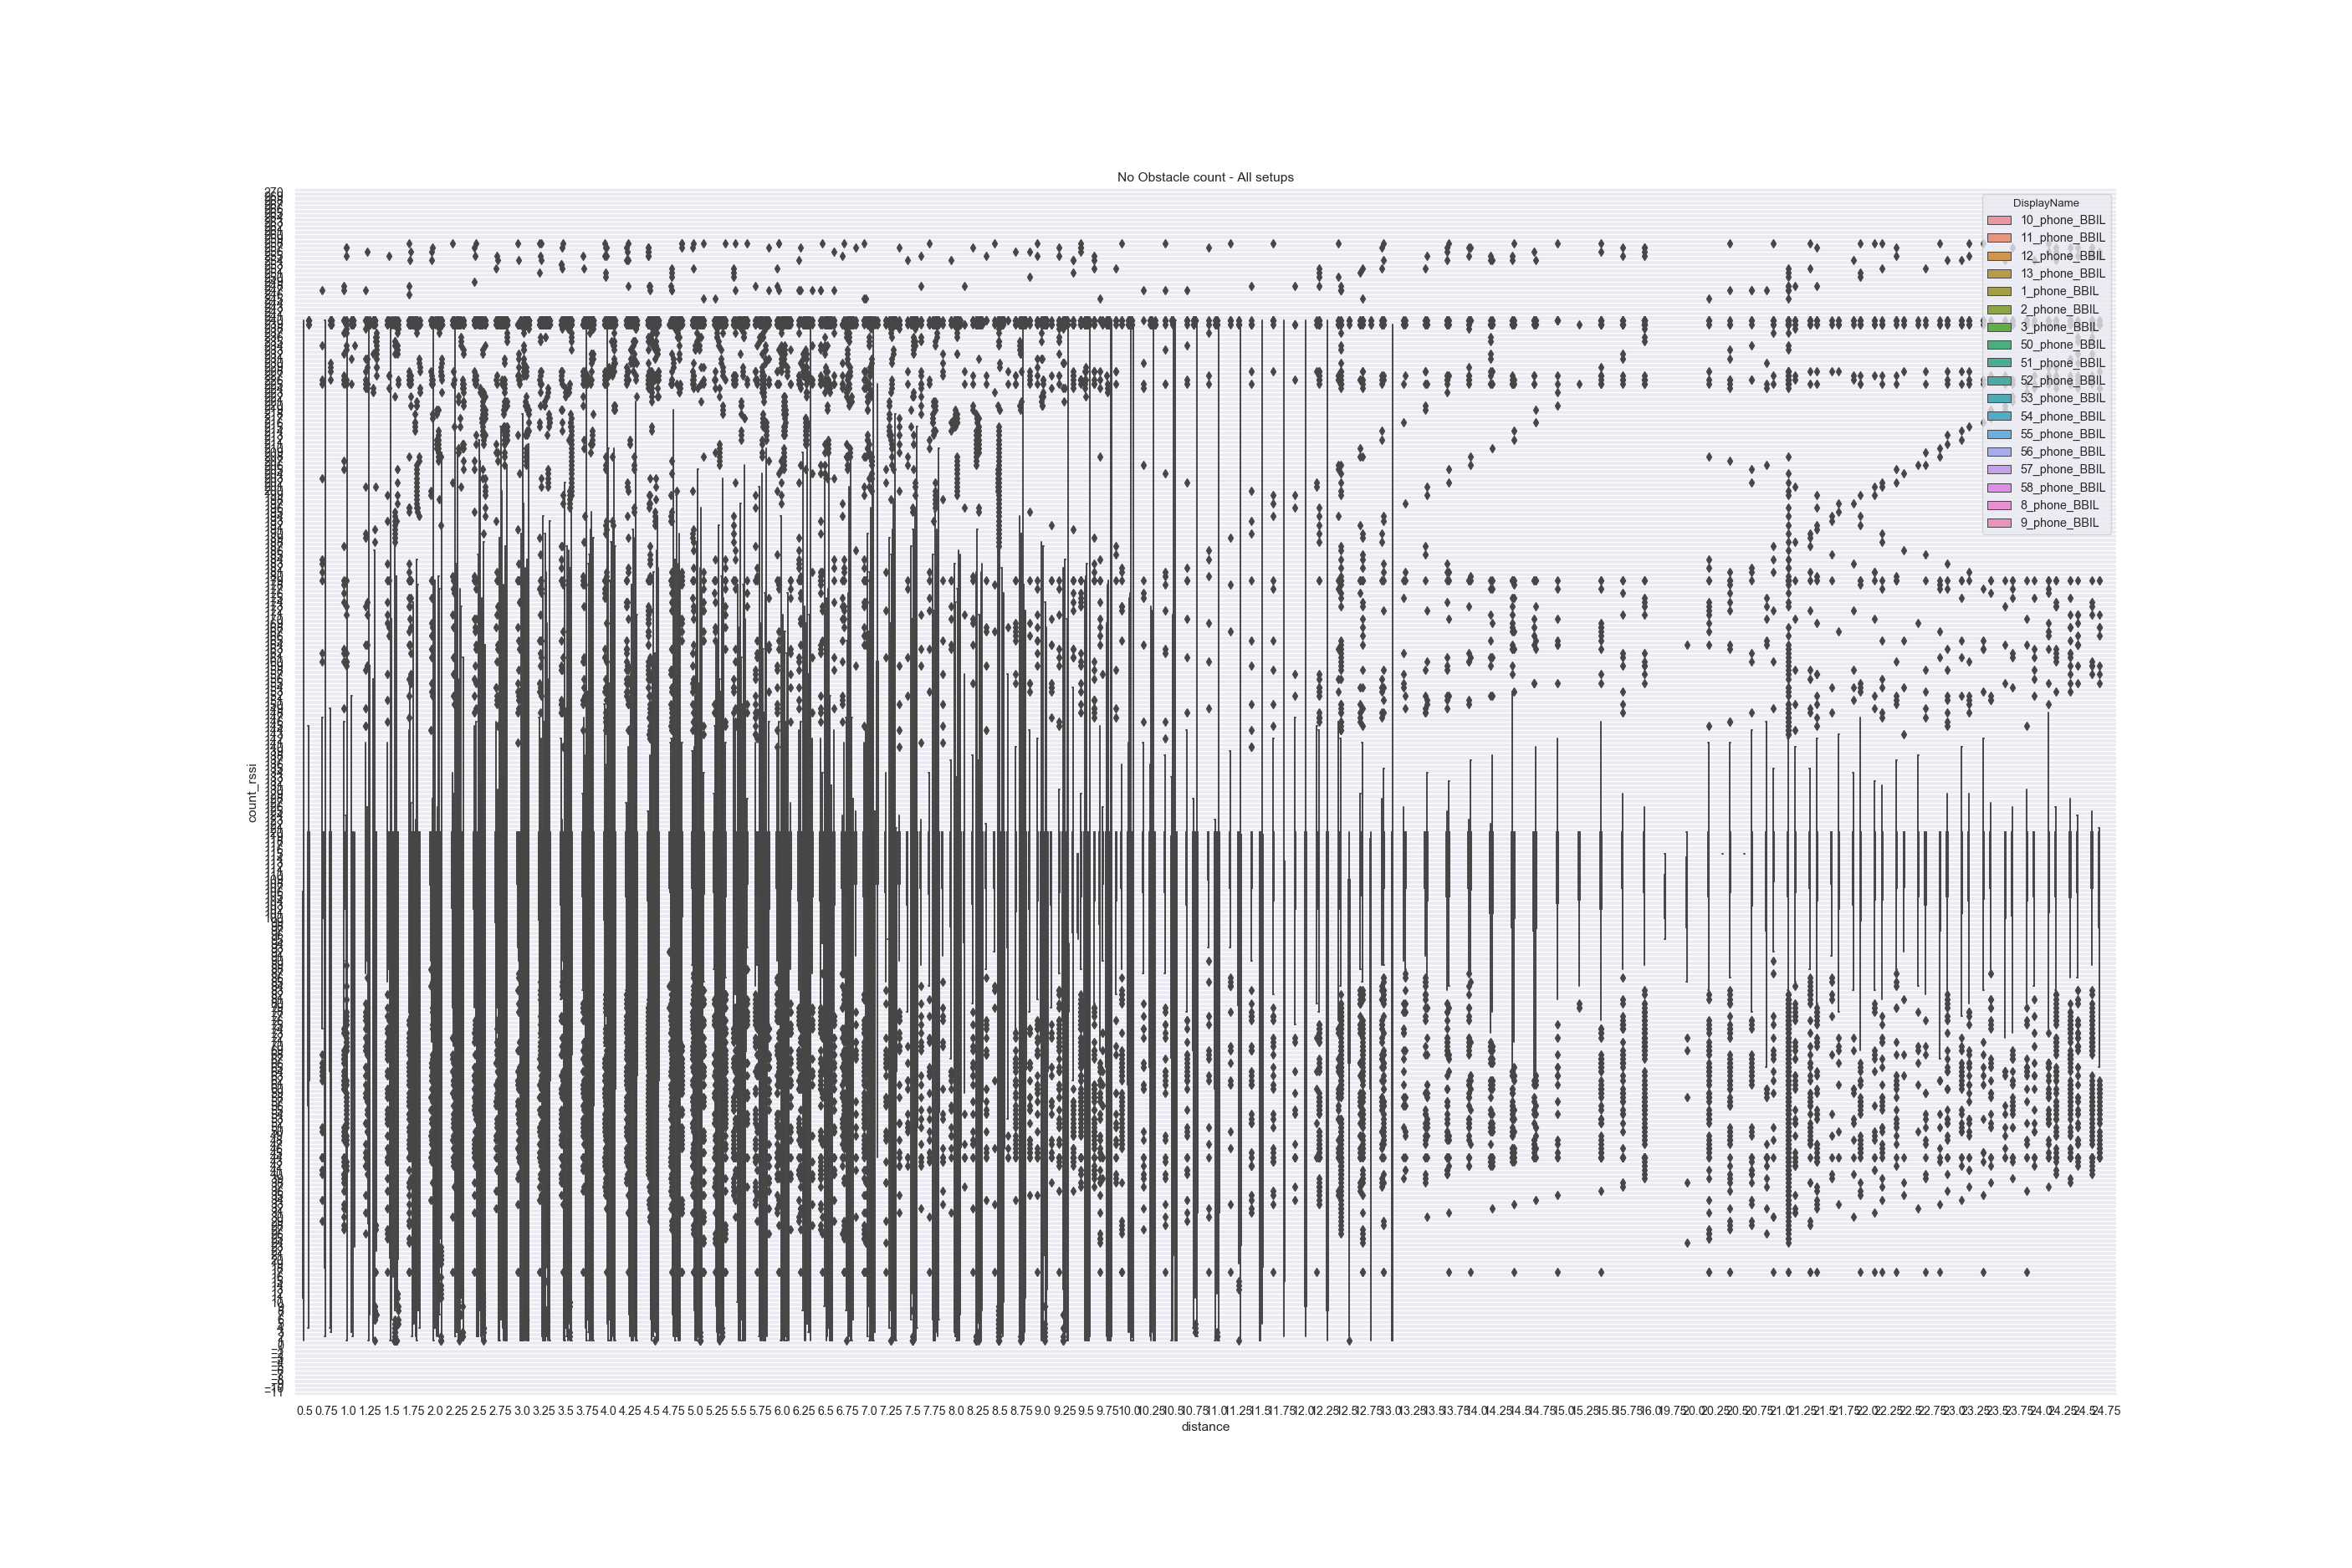

In [11]:
PlotFuncsObj.plot_data('count', plot_func='boxplot',obstacle='No Obstacle',roll_by_2= rolling_by_2, plot_hue=1)
fig1 = plt.gcf()
fig1.savefig("count_rssi.png")

In [ ]:
# plot violinplot to show semi distribution
PlotFuncsObj.plot_data( 'count', plot_func='violinplot',obstacle='No Obstacle',roll_by_2= rolling_by_2, plot_hue=0)
fig1 = plt.gcf()
# fig1.savefig("count_rssi_violinplot.png")

Plot wanted percentile 

In [12]:
wanted_percentile = 90

<IPython.core.display.Javascript object>


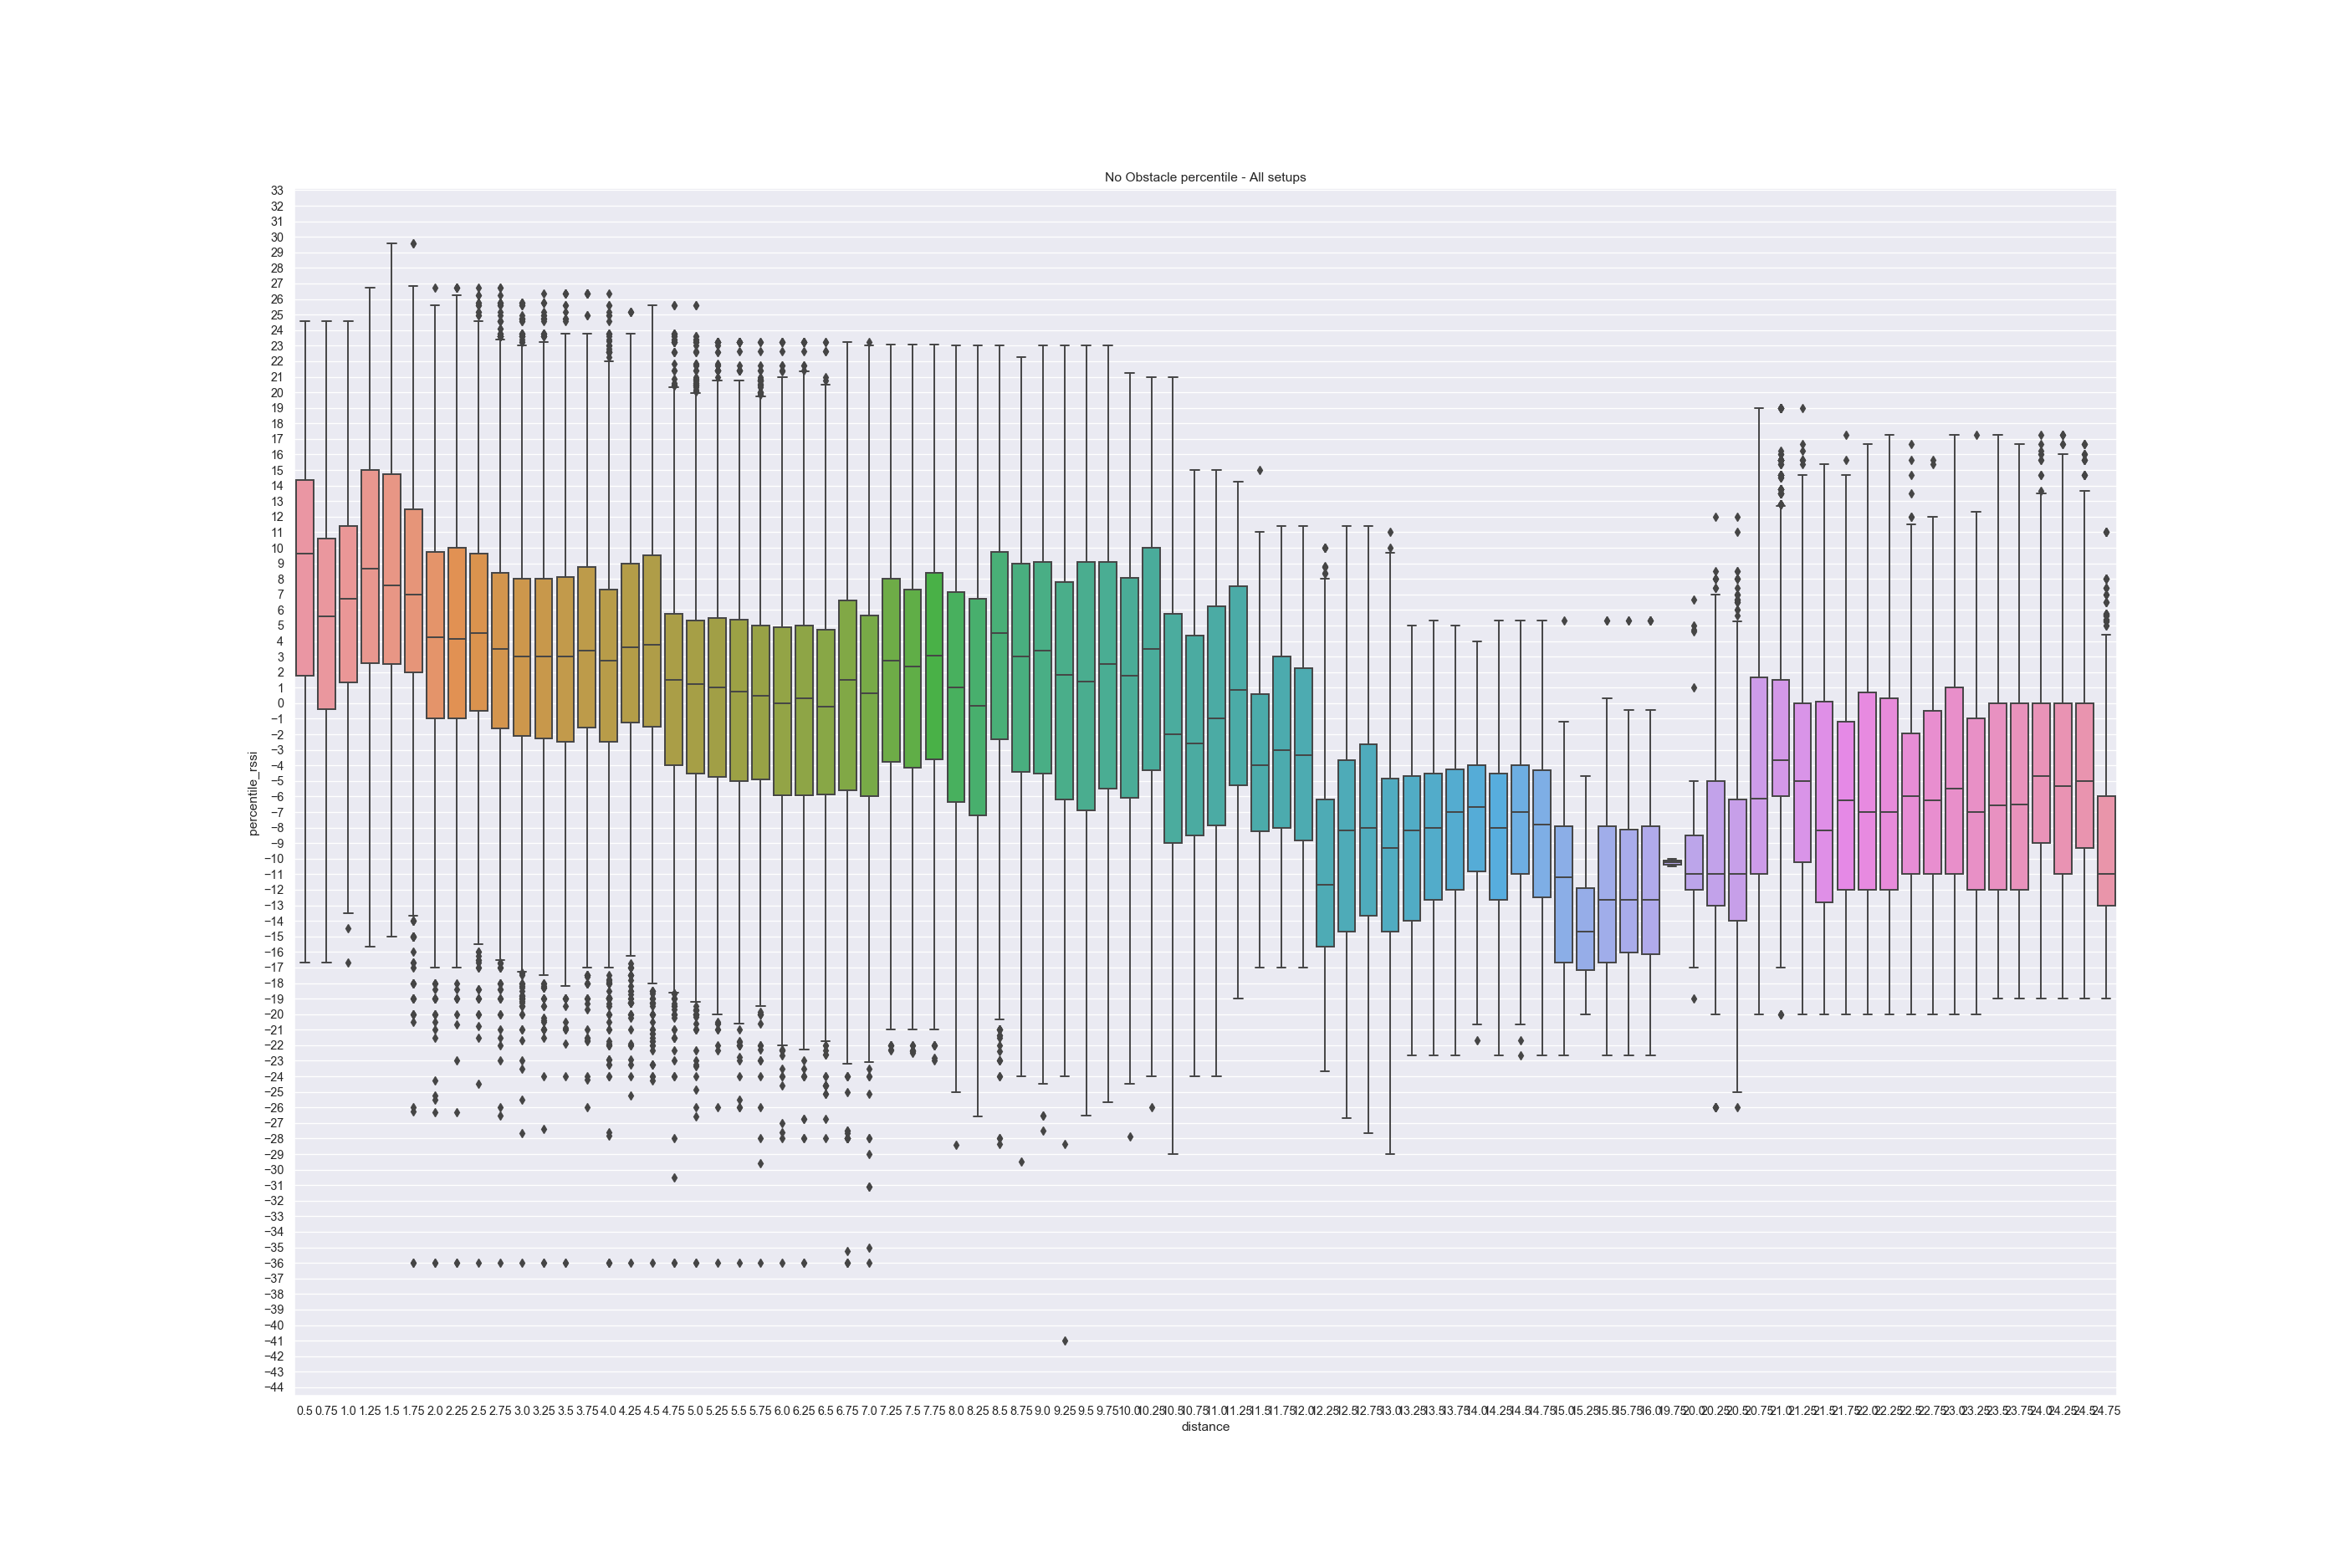

In [13]:
# PlotFuncsObj.set_minor_axes_size(1)
PlotFuncsObj.plot_data( 'percentile', plot_func='boxplot',obstacle='No Obstacle',roll_by_2= rolling_by_2,percent=wanted_percentile,plot_hue=0)
fig1 = plt.gcf()
fig1.savefig("percentile_"+str(wanted_percentile) +"_rssi.png")

In [ ]:
# plot violinplot to show semi distribution
PlotFuncsObj.plot_data( 'percentile', plot_func='violinplot',obstacle='No Obstacle',roll_by_2= rolling_by_2,percent=wanted_percentile,plot_hue=0)
fig1 = plt.gcf()
# fig1.savefig("percentile_"+str(wanted_percentile) +"_rssi_violinplot.png")

In [ ]:
np.unique(np.round(plot_tag_data.distance*4)/4)

Plot above percentile

In [14]:
wanted_percentile = 90

<IPython.core.display.Javascript object>


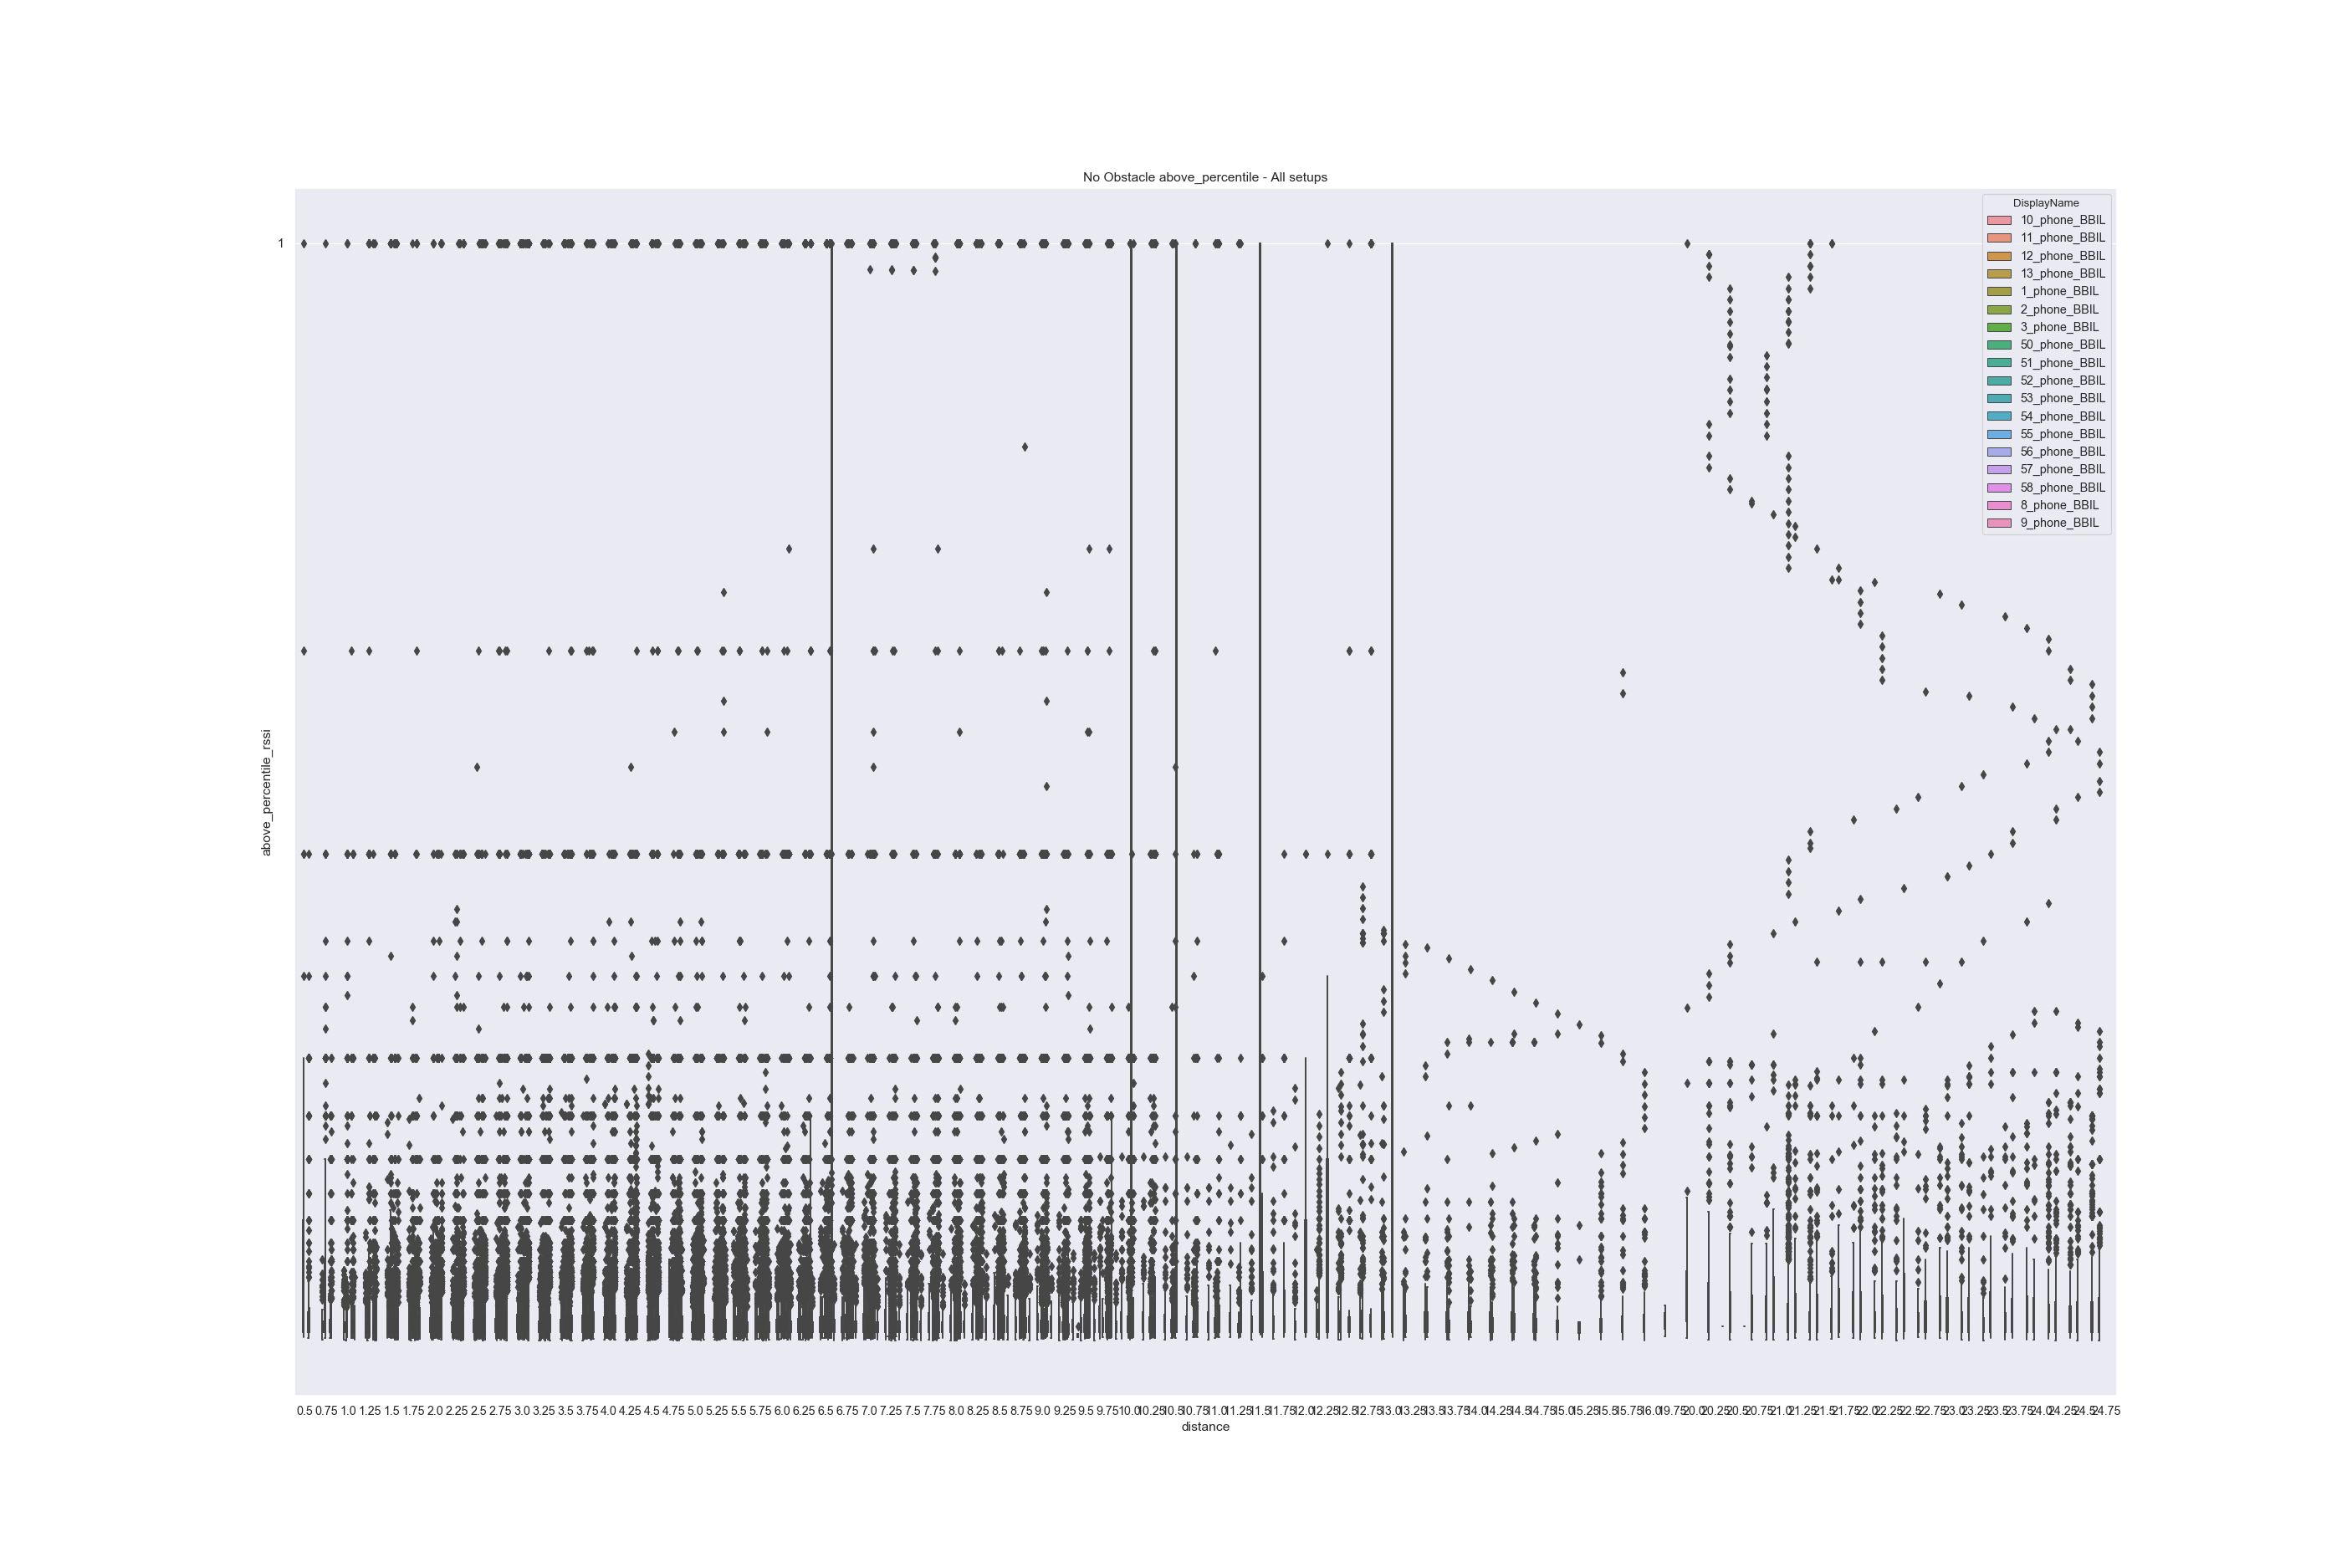

In [15]:
PlotFuncsObj.plot_data( 'above_percentile', plot_func='boxplot',obstacle='No Obstacle',roll_by_2= rolling_by_2,percent=wanted_percentile, margin = 0,plot_hue=1)
fig1 = plt.gcf()
fig1.savefig("above_percentile_"+str(wanted_percentile)+"_rssi.png")

In [ ]:
PlotFuncsObj.plot_data( 'above_percentile', plot_func='violinplot',obstacle='No Obstacle',roll_by_2= rolling_by_2,percent=wanted_percentile, margin = 0,plot_hue=0)
fig1 = plt.gcf()
# fig1.savefig("above_percentile_"+str(wanted_percentile)+"_rssi_violinplot.png")

Plot counts above percentile

In [16]:
wanted_percentile = 90
margin = 0 

<IPython.core.display.Javascript object>


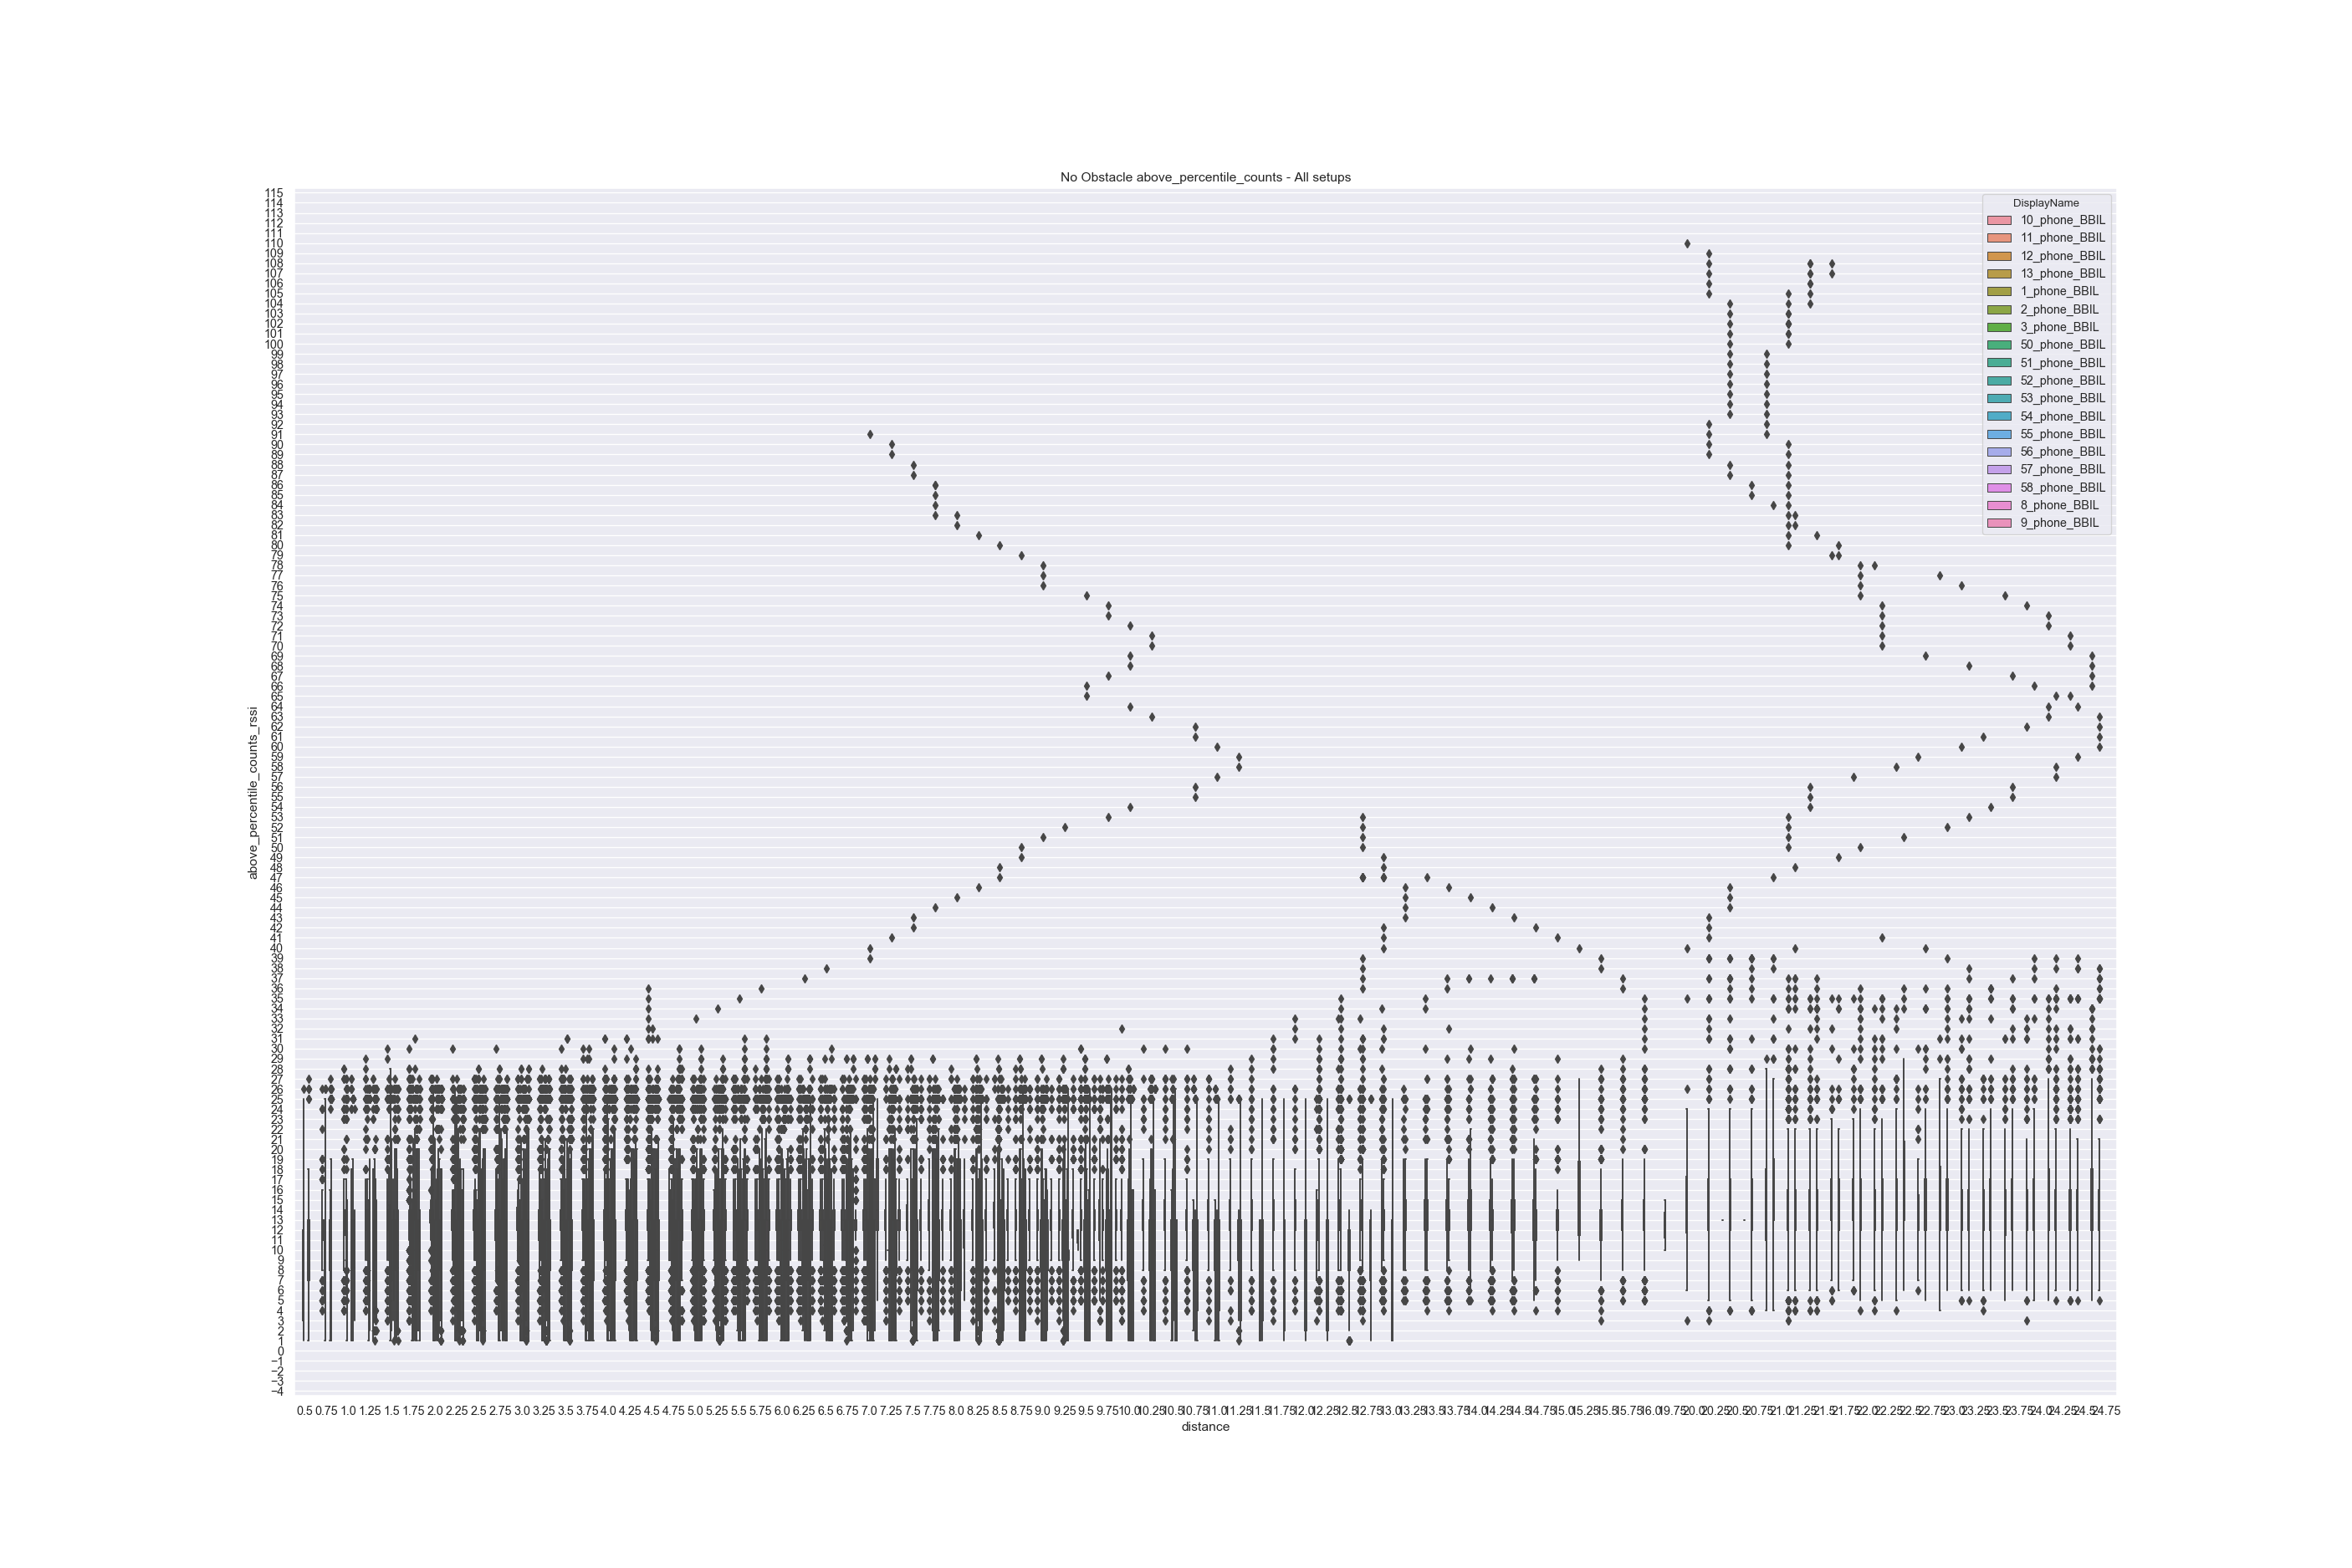

In [17]:
PlotFuncsObj.plot_data( 'above_percentile_counts', plot_func='boxplot',obstacle='No Obstacle',roll_by_2= rolling_by_2,percent=wanted_percentile, margin = margin,plot_hue=1)
fig1 = plt.gcf()
fig1.savefig("above_percentile_"+str(wanted_percentile)+"_rssi.png")

Plot difference between percentiles

In [18]:
top_percentile = 80
bottom_percentile = 30

<IPython.core.display.Javascript object>


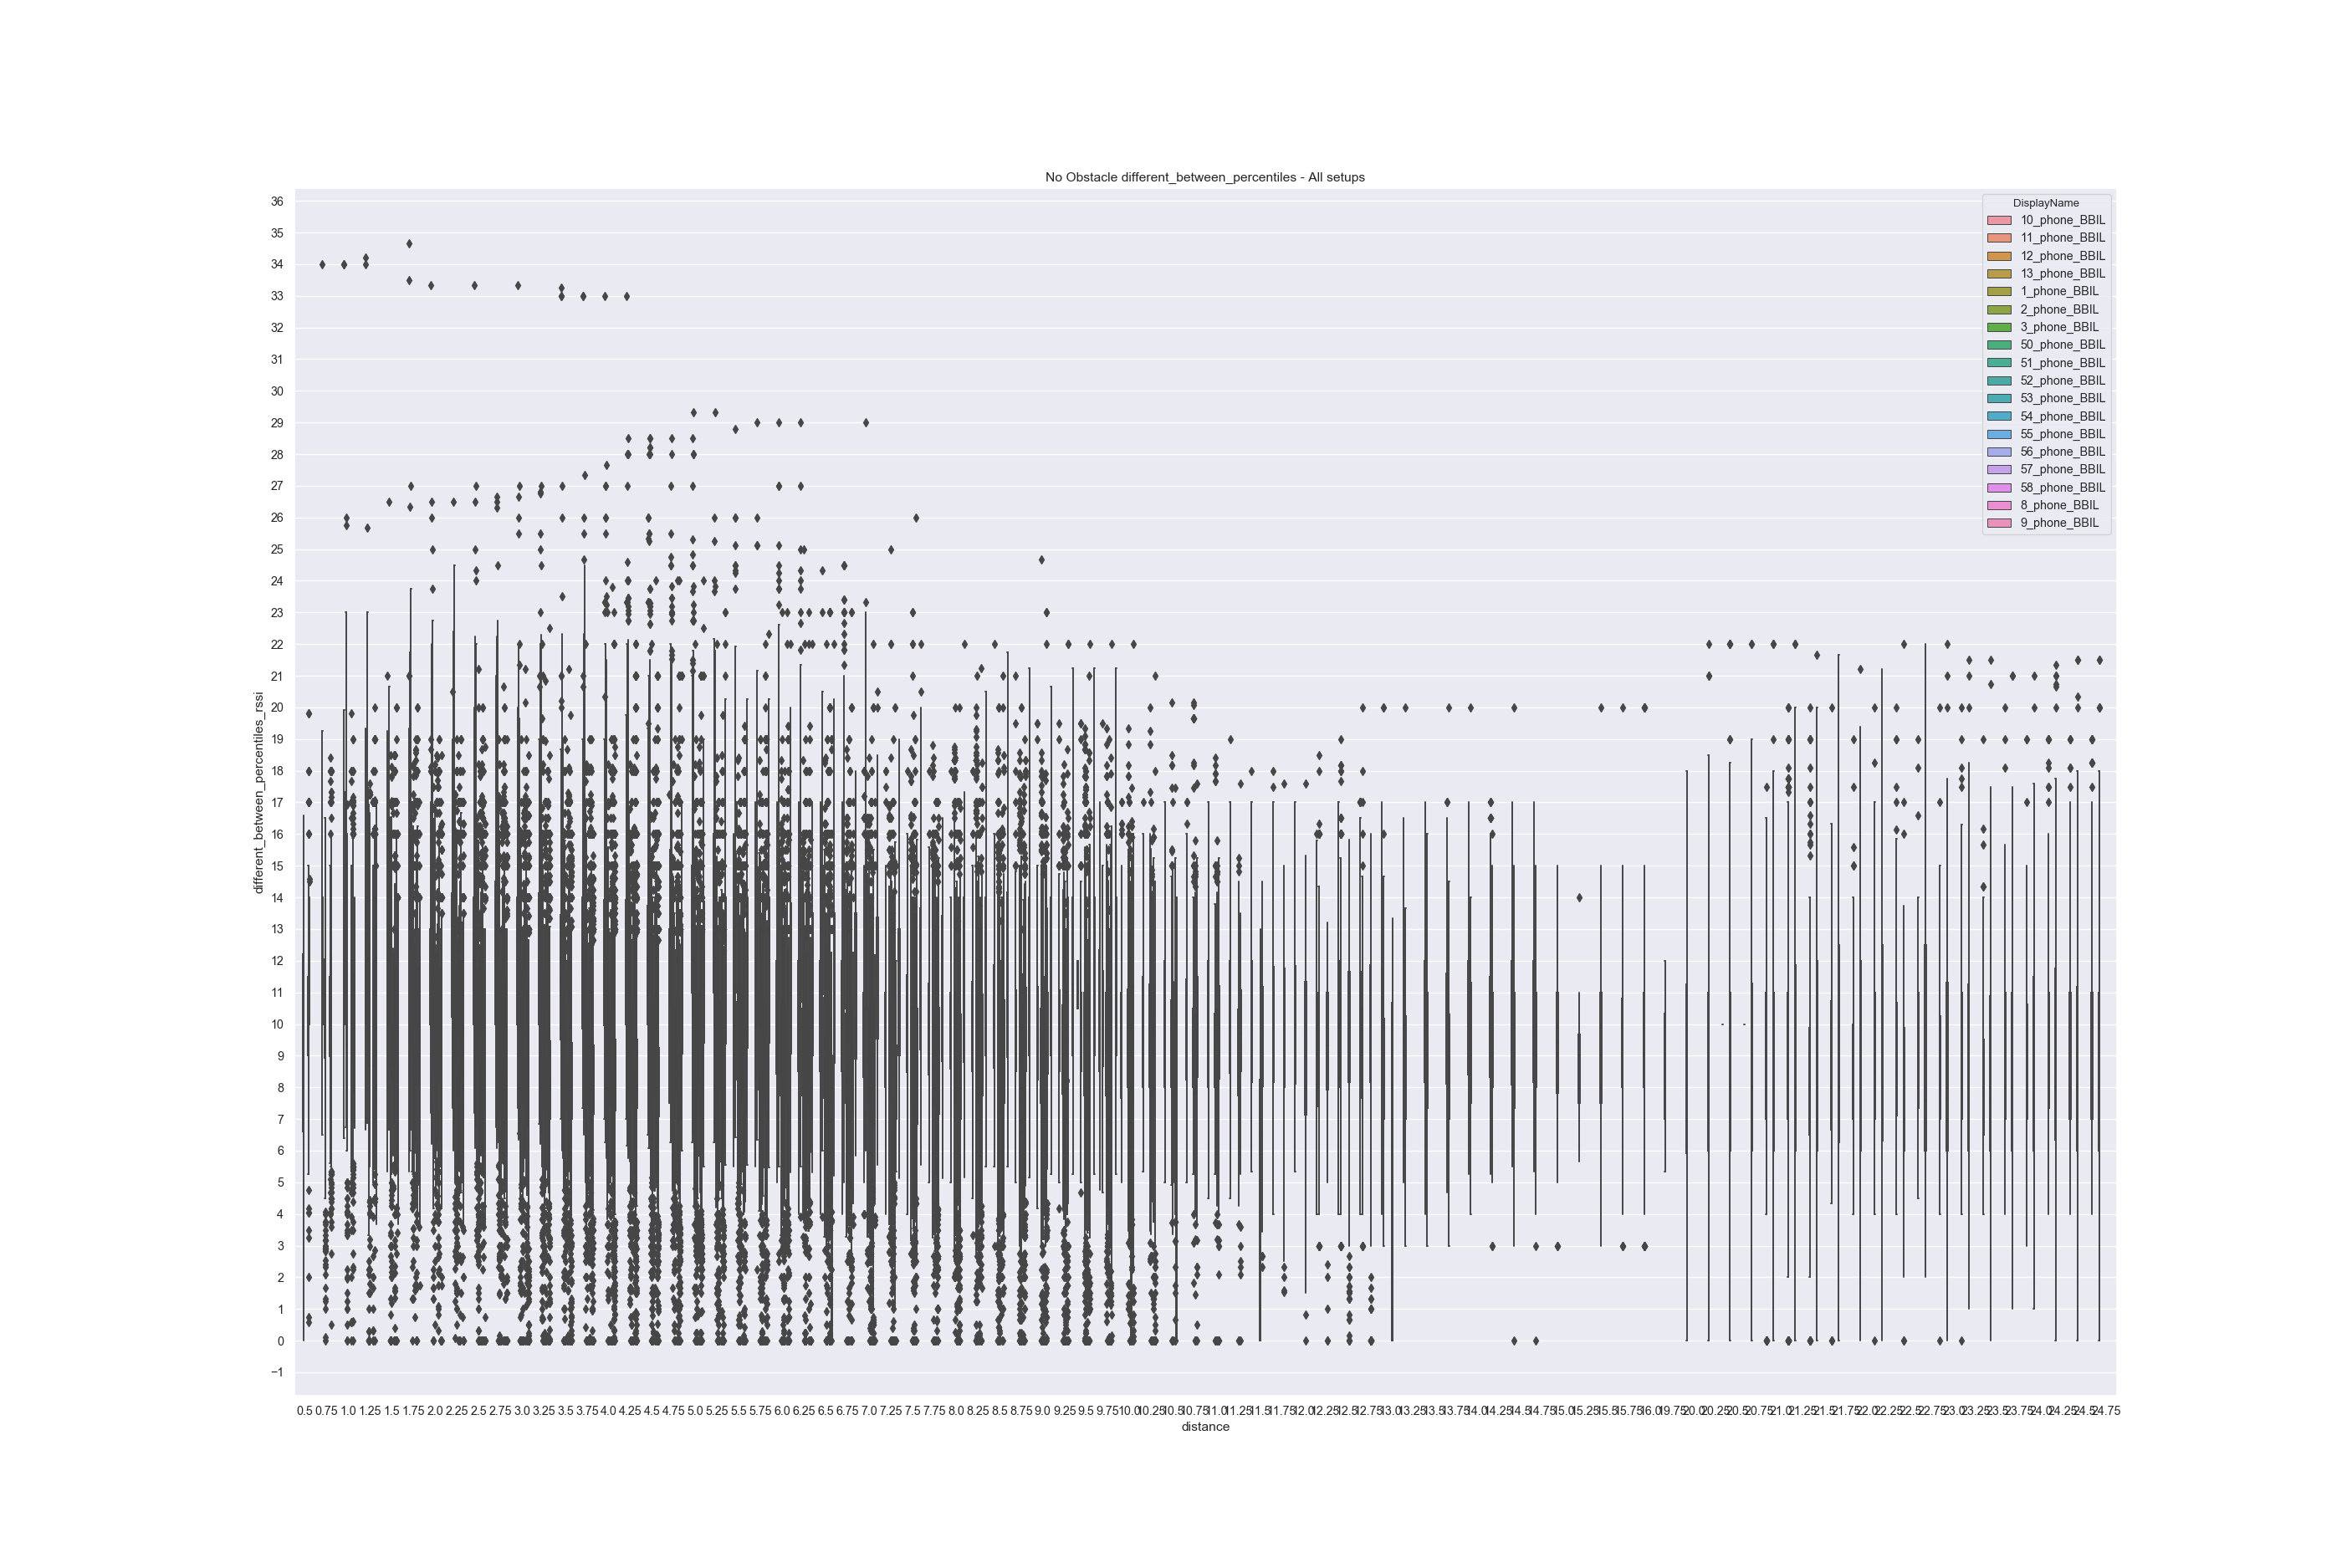

In [19]:
PlotFuncsObj.plot_data( 'different_between_percentiles', plot_func='boxplot',obstacle='No Obstacle',roll_by_2= rolling_by_2,top_percent=top_percentile, bottom_percent = bottom_percentile,plot_hue=1)
fig1 = plt.gcf()
fig1.savefig("different_between_percentiles_"+str(bottom_percentile)+"to"+str(top_percentile)+"_rssi.png")

# Scores

Normalized

window = 60s; distance - 1.5m ; mean rssi > -7dB 

In [ ]:
score_obj = ScoreClass(plot_tag_data, 60, 'mean', 1.5, -7)
score_obj.get_all_scores()

window = 60s; distance - 3m ; mean rssi > -8dB 

In [ ]:
score_obj = ScoreClass(plot_tag_data, 60, 'mean', 3, -8)
score_obj.get_all_scores()

window = 60s; distance - 3.5m ; percentile 90 > -5dB 

In [ ]:
score_obj = ScoreClass(plot_tag_data, 60, 'percentile', 3.5, -5, percent = 90)
score_obj.get_all_scores()

window = 60s; distance - 2.5m ; percentile 90 > -3dB 

In [ ]:
score_obj = ScoreClass(plot_tag_data, 60, 'percentile', 2.5, -3, percent = 90)
score_obj.get_all_scores()

window = 30s; distance - 3.5m ; median > -7dB 

In [ ]:
score_obj = ScoreClass(plot_tag_data, 30, 'median', 3.5, -7)
score_obj.get_all_scores()

window = 30s; distance - 1.75m ; median > -6dB 

In [ ]:
score_obj = ScoreClass(plot_tag_data, 30, 'median', 1.75, -6)
score_obj.get_all_scores()

window = 90s; distance - 1.75m ; mean > -6dB 

In [ ]:
score_obj = ScoreClass(plot_tag_data, 90, 'mean', 1.75, -6)
score_obj.get_all_scores()

window = 90s; distance - 1.5m ; mean > -3dB 

In [ ]:
score_obj = ScoreClass(plot_tag_data, 90, 'mean', 1.5, -4)
score_obj.get_all_scores()

In [ ]:
all_tag_measurements

# Are the two devices in the same room?


In [ ]:
measurements_same_room = all_tag_measurements.where(all_tag_measurements.obstacle == 'No Obstacle')
measurements_same_room = measurements_same_room.dropna(how='any').reset_index(drop=True)

measurements_other_room = all_tag_measurements.where(all_tag_measurements.obstacle == 'Obstacle: wall')
measurements_other_room = measurements_other_room.dropna(how='any').reset_index(drop=True)

sns.boxplot(x=all_tag_measurements["obstacle"], y=all_tag_measurements["rssi"], hue =all_tag_measurements["DisplayName"]).set_title('All distances')